In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#my datset
ml = pd.read_csv("train.csv")
import warnings
warnings.filterwarnings('ignore')

In [3]:
ml.head()

,Unnamed: 0,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,134857,43127,21.0,1,1,0,0,0,0,0.0,...,32.0,0.0,0.0,0,0,0.0,0.0,0,0,0
1,604,60250,61.0,1,1,0,0,0,0,0.0,...,32.0,0.0,0.0,0,0,0.0,0.0,0,0,0
2,792310,80,1.0,2,0,0,0,0,0,0.0,...,32.0,0.0,0.0,0,0,0.0,0.0,0,0,4
3,659776,54446,67.0,1,1,0,0,0,0,0.0,...,32.0,0.0,0.0,0,0,0.0,0.0,0,0,0
4,3160,53,32545.0,2,2,52,180,26,26,26.0,...,32.0,0.0,0.0,0,0,0.0,0.0,0,0,0


In [4]:
cols = ml.columns

In [5]:
l=ml['Total Fwd Packets']+ml['Total Backward Packets']

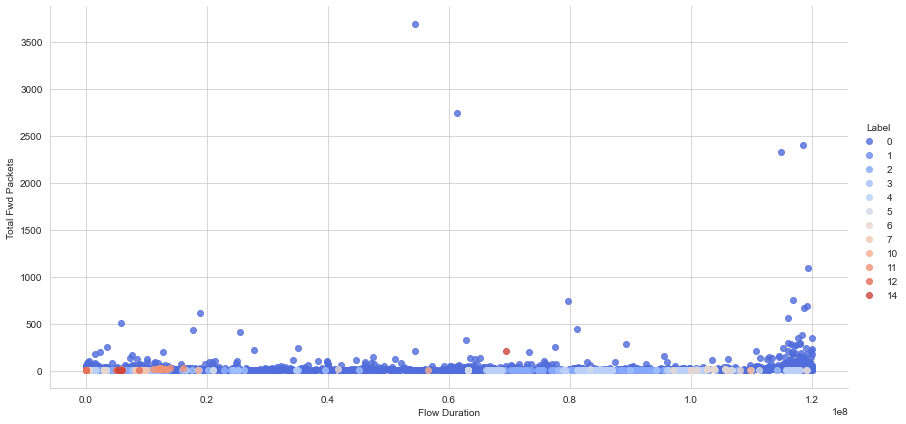

In [6]:
sns.set_style('whitegrid')
sns.lmplot('Flow Duration','Total Fwd Packets',data=ml, hue='Label',
           palette='coolwarm',size=6,aspect=2,fit_reg=False)

In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(n_clusters=10)

In [9]:
kmeans.fit(ml.drop('Label',axis=1))

KMeans(n_clusters=10)

In [10]:
kmeans.cluster_centers_

array([[ 1.11908660e+06,  9.19096949e+03,  9.53808549e+05,
         3.40717244e+00,  2.91107849e+00,  3.11068054e+02,
         1.93602920e+03,  1.21885230e+02,  2.12326849e+01,
         4.55088795e+01,  3.93618877e+01,  4.53828186e+02,
         4.68474807e+01,  1.84450298e+02,  1.73247134e+02,
         1.03978951e+06,  8.76275562e+04,  1.78468670e+05,
         2.96193872e+05,  7.97253896e+05,  3.84344650e+04,
         7.32523209e+05,  2.03592706e+05,  2.72423939e+05,
         6.33930040e+05,  5.48115233e+04,  4.57941543e+05,
         9.73624121e+04,  1.23182271e+05,  3.42770101e+05,
         3.28434323e+04,  4.72919834e-02,  0.00000000e+00,
         2.09720547e-04,  0.00000000e+00,  9.21845541e+01,
         7.81309705e+01,  7.72587092e+04,  8.37650177e+03,
         1.85697059e+01,  4.97966969e+02,  1.13536018e+02,
         1.68250281e+02,  2.79484616e+05,  1.87175589e-02,
         4.72919834e-02,  2.09720547e-04,  2.73370733e-01,
         3.11120432e-01,  1.06905049e-01,  2.09720547e-0

In [11]:
X=ml
y=ml['Label']

In [12]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 16697 out of 22646 samples were correctly labeled.


In [13]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.74


In [14]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
kmeans.inertia_

9.499002091282555e+18

In [16]:
kmeans.n_iter_

9

In [17]:
from collections import Counter
Counter(kmeans.labels_)

Counter({0: 19073,
         6: 438,
         1: 313,
         7: 821,
         4: 792,
         3: 721,
         9: 267,
         8: 183,
         5: 20,
         2: 18})

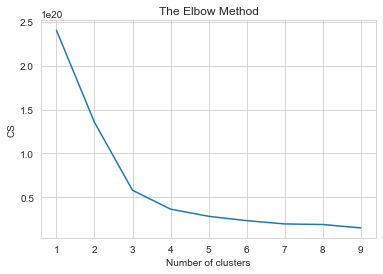

In [18]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'random', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 10), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()